# 기초상품 추천 코드 구현해보기
주어진 데이터를 활용하여 유저 아이디와 원하는 제품 유형을 입력하면   
해당 유저와 유사도가 높은 유저의 평점 높은 제품을 추천해주는 함수 만들기

* 유저데이터 파일명 : user_data
* 제품데이터 파일명 : product_data

In [44]:
import pandas as pd

#유저데이터 불러오기
u_data = pd.read_csv('user_data.csv')

#제품데이터 불러오기
p_data = pd.read_csv('product_data.csv')

In [45]:
#product_id 기준으로 유저,제품 데이터 합쳐서 df에 저장하고 user_id를 기준으로 오름차순 정렬
df = pd.merge(p_data, u_data, on='product_id').sort_values(by='user_id')
df.drop(['Unnamed: 5','Unnamed: 6'],axis=1, inplace=True)

df.head()

,product_id,product_name,product_type,target_skin_type,ingredient,user_id,rating,skin
895,24.0,serum_3,세럼,민감성,"쑥잎추출물, 정제수, 글리세린, 다이프로필렌글라이콜, 판테놀, 1,2-헥산다이올, ...",1,4,민감성
1440,38.0,toner_6,토너,건성,"정제수, 다이프로필렌글라이콜, 글리세레스-26, 1,2-헥산다이올, 나이아신아마이드...",1,5,민감성
1524,40.0,toner_8,토너,민감성,"정제수, 어성초추출물(=약모밀추출물, 20%), 메틸프로판다이올, 펜틸렌글라이콜, ...",1,5,민감성
1288,34.0,lotion_6,로션,건성,"아벤느온천수(아쿠아),글리세린,카프릴릭/카프릭트리글리세라이드,이소프로필팔미테이트,프...",1,4,민감성
1249,33.0,serum_6,세럼,지성,"아쿠아(아벤느 온천수),아이소프로필알코올,피이지-6,글리세린,흰무늬엉겅퀴열매추출물,...",1,1,민감성


In [46]:
#각 유저가 제품에 남긴 평점들로 이루어진 데이터 프레임(df_users) 만들기 인덱스:user_id, 컬럼명:product_id
df_users = df.pivot_table('rating', index='user_id', columns='product_id')
df_users.fillna(0, inplace=True)
df_users.head()

product_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,0.0,5.0,0.0,2.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,0.0,4.0,3.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_users.shape

(100, 60)

In [48]:
#유저간 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity
cos_matrix = cosine_similarity(df_users.values,df_users.values)
cos_matrix

array([[1.        , 0.37756255, 0.11836501, ..., 0.30848211, 0.30876888,
        0.33248992],
       [0.37756255, 1.        , 0.10316111, ..., 0.22016375, 0.30076748,
        0.11435019],
       [0.11836501, 0.10316111, 1.        , ..., 0.3901178 , 0.2384219 ,
        0.27498715],
       ...,
       [0.30848211, 0.22016375, 0.3901178 , ..., 1.        , 0.09955444,
        0.40333349],
       [0.30876888, 0.30076748, 0.2384219 , ..., 0.09955444, 1.        ,
        0.23491702],
       [0.33248992, 0.11435019, 0.27498715, ..., 0.40333349, 0.23491702,
        1.        ]])

In [49]:
cos_matrix.shape

(100, 100)

In [50]:
#위에서 계산한 cos_matrix를 데이터프레임으로 만듭니다.
df_users_cosine=pd.DataFrame(data=cos_matrix, index=df_users.index, columns=df_users.index)
df_users_cosine.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.377563,0.118365,0.195347,0.465273,0.350255,0.369234,0.382708,0.209271,0.388365,...,0.434633,0.327872,0.595550,0.253139,0.292668,0.306267,0.256333,0.308482,0.308769,0.332490
2,0.377563,1.000000,0.103161,0.106745,0.226767,0.327382,0.163269,0.323855,0.210206,0.190810,...,0.244048,0.212365,0.221078,0.246255,0.231953,0.218187,0.195578,0.220164,0.300767,0.114350
3,0.118365,0.103161,1.000000,0.328517,0.265719,0.423921,0.313412,0.399815,0.202431,0.194410,...,0.362167,0.376298,0.201629,0.211564,0.175430,0.439941,0.336052,0.390118,0.238422,0.274987
4,0.195347,0.106745,0.328517,1.000000,0.306010,0.280929,0.385025,0.287416,0.299863,0.477361,...,0.165149,0.281387,0.224007,0.263200,0.185619,0.296223,0.209036,0.376882,0.164470,0.357317
5,0.465273,0.226767,0.265719,0.306010,1.000000,0.209787,0.217964,0.221134,0.097609,0.239447,...,0.267159,0.319854,0.243056,0.183303,0.338358,0.361589,0.202548,0.051116,0.259230,0.302407


## 입력한 아이디의 유저와 비슷한 유저가 만족한 제품 추천하는 함수 만들기
1. df_users_cosine에서 입력한 아이디와 유사도 높은 5명을 sim_users로 지정
2. df에서 user_id가 sim_users의 인덱스와 일치하는 값들을 sim_user_df에 할당
3. sim_user_df에서 입력한 product_type과 일치하는 값들을 지정하고 rating을 기준으로 내림차순한 결과를 products에 할당
4. products에서 rating 4점 이상인 값들만 다시 products에 할당
5. products에서 product_name이 중복인 것은 첫번째 값만 남김
6. products의 product_name을 데이터 프레임 result로 만듦 (컬럼명은 나와 비슷한 사용자가 만족한(입력한 제품타입)제품)
7. 함수 마지막에 print(result) 출력

In [51]:
#반드시 skeleton 코드에 맞춰서 작성하지 않아도 됨. 단, 작성한 코드에 대해 어떤 알고리즘으로 결과가 나오게 했는지 설명할 수 있어야함.

def user_based_recommend(user_id, product_type):

    # 유사도 높은 5명을 sim_users로 지정
    sim_users = df_users_cosine.loc[user_id,:]
    sim_users[user_id] = 0
    sim_users = sim_users.sort_values(ascending = False).head(5)
    # sim_users = df_users_cosine[user_id].sort_values(ascending=False).index[1:6]

    # sim_users의 인덱스와 일치하는 값들을 sim_user_df에 할당
    sim_user_df = df[df['user_id'].isin(sim_users.index)]

    # 입력한 product_type과 일치하는 값들을 지정하고 rating을 기준으로 내림차순한 결과를 products에 할당
    products = sim_user_df[sim_user_df['product_type'] == product_type].sort_values(by = 'rating', ascending = False)

    # rating 4점 이상인 값들만 다시 products에 할당
    products = products[products['rating'] >= 4.0]

    # products에서 product_name이 중복인 것은 첫번째 값만 남김
    products.drop_duplicates(['product_name'], keep = 'first',inplace=True)
    products.reset_index(drop=True)

    # product_name을 데이터 프레임 result로 만듦
    result = pd.DataFrame(products['product_name']).rename(columns={'product_name':'나와 비슷한 사용자가 만족한 '+ product_type +'제품'})
    result.reset_index(drop=True, inplace=True)

    # 함수 마지막에 print(result) 출력
    print(result)

<img src="./추천결과예시.PNG" width ="300px" height ="200px"></img>

user_id: 1~100  
product_type: 토너, 로션, 앰플, 세럼, 크림, 에센스  

In [52]:
user_based_recommend(1, "토너")

  나와 비슷한 사용자가 만족한 토너제품
0              toner_1
1              toner_2
2             toner_11
3              toner_6
4              toner_8
5              toner_5


# 추천시스템 웹페이지 제작

- 위에서 구현한 추천시스템을 이용할 수 있는 웹페이지를 제작
- 자세한 코드는 추가자료의 py, html 자료 확인

app.py

```
rom flask import Flask, render_template, request
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

app = Flask(__name__)

# 유저데이터와 제품데이터 불러오기
u_data = pd.read_csv('user_data.csv')
p_data = pd.read_csv('product_data.csv')
p_data.drop(columns=['Unnamed: 5', 'Unnamed: 6'], inplace=True)

# product_id를 기준으로 유저, 제품 데이터를 합쳐 df에 저장, user_id를 기준으로 오름차순 정렬
df = pd.merge(p_data, u_data, on='product_id', how='left').sort_values(by='user_id')

# 각 유저가 제품에 남긴 평점들로 이루어진 데이터 프레임(df_users) 만들기 인덱스:user_id, 컬럼명:product_id
df_users = df.pivot_table('rating', index='user_id', columns='product_id')
df_users.fillna(0, inplace=True)

# 유저간 유사도 계산
cos_matrix = cosine_similarity(df_users.values, df_users.values)

# 위에서 계산한 cos_matrix를 데이터프레임으로 만듭니다.
df_users_cosine = pd.DataFrame(data=cos_matrix, index=df_users.index, columns=df_users.index)



def user_based_recommend(user_id, product_type):
    # 1. df_sers_cosine에서 입력한 아이디와 유사도 높은 5명을 sim_users로 설정
    sim_users = df_users_cosine.loc[user_id,:]
    sim_users[user_id] = 0
    sim_users = sim_users.sort_values(ascending = False).head(5)

    # 2. df에서 user_id가 sim_users의 인덱스와 일치하는 값들을 sim_user_df에 할당
    sim_user_df = df[df['user_id'].isin(sim_users.index)]

    # 3. sim_user_df에서 입력한 product_type과 일치하는 값들을 지정하고 rating을 기준으로 내림차순한 결과를 product에 할당
    products = sim_user_df[sim_user_df['product_type'] == product_type].sort_values(by = 'rating', ascending = False)

    # 4. products에서 rating 4점 이상인 값들만 다시 products에 할당
    products = products[products['rating'] >= 4]

    # 5. products에서 product_name이 중복인 것은 첫번째 값만 남김
    products.drop_duplicates(subset='product_name', keep='first', inplace=True)
    products.reset_index(drop=True)

    # 6. products의 product_name을 데이터 프레임 result로 만듦
    result = pd.DataFrame({f'나와 비슷한 사용자가 만족한 {product_type} 제품': products['product_name']})

    # 7. products의 product_name 컬럼을 데이터프레임 result로 만듦
    result = products['product_name'].tolist()

    title = f'나와 비슷한 사용자가 만족한 {product_type} 제품'

    return title, result


@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        user_id = int(request.form['user_id'])
        product_type = request.form['product_type']
        title, result = user_based_recommend(user_id, product_type)
        return render_template('result.html', title=title, result=result)
    return render_template('index.html')

if __name__ == '__main__':
    app.run(debug=True)
```



index.html

```
<!DOCTYPE html>
<html>
<head>
    <title>Recommendation Input</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            background-color: #f0f0f0;
        }
        h1 {
            margin-bottom: 20px;
            color: #333;
        }
        form {
            display: flex;
            flex-direction: column;
            align-items: center;
            padding: 20px;
            border: 1px solid #ccc;
            border-radius: 5px;
            background-color: #fff;
            box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.1);
        }
        label {
            font-weight: bold;
            margin-bottom: 15px;
            color: #333;
        }
        select, input {
            width: 100%;
            padding: 8px;
            border: 1px solid #ccc;
            border-radius: 3px;
            font-size: 14px;
            margin-bottom: 15px; /* 조정 */
        }
        select {
            margin-bottom: 15px;
        }
        button {
            padding: 10px 20px;
            background-color: #007bff;
            color: #fff;
            border: none;
            border-radius: 3px;
            cursor: pointer;
            font-size: 14px;
            transition: background-color 0.2s ease;
        }
        button:hover {
            background-color: #0056b3;
        }
    </style>
</head>
<body>
    <h1>Cosmetic Recommendation system</h1>
    <form method="POST">
        <label for="user_id">User ID (0-100):</label>
        <input type="number" name="user_id" min="0" max="100" required>
        
        <label for="product_type">Product Type:</label>
        <select name="product_type" required>
            <option value="토너">토너</option>
            <option value="로션">로션</option>
            <option value="앰플">앰플</option>
            <option value="세럼">세럼</option>
            <option value="크림">크림</option>
            <option value="에센스">에센스</option>
        </select>
        
        <button type="submit">Get Recommendations</button>
    </form>
</body>
</html>

```



result.html


```
<!DOCTYPE html>
<html>
<head>
    <title>Recommendation Result</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            background-color: #f0f0f0;
        }
        h1 {
            margin-bottom: 20px;
            color: #333;
        }
        table {
            text-align: center;
            border-collapse: collapse;
            width: 80%;
            max-width: 600px;
            margin-top: 20px;
            background-color: #fff;
            box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.1);
        }
        th, td {
            padding: 10px;
            border: 1px solid #ccc;
        }
    </style>
</head>
<body>
    <h1>{{ title }}</h1>
    <table>
        {% for product in result %}
            <tr>
                <td>{{ product }}</td>
            </tr>
        {% endfor %}
    </table>
</body>
</html>

```



## 웹사이트 미리보기

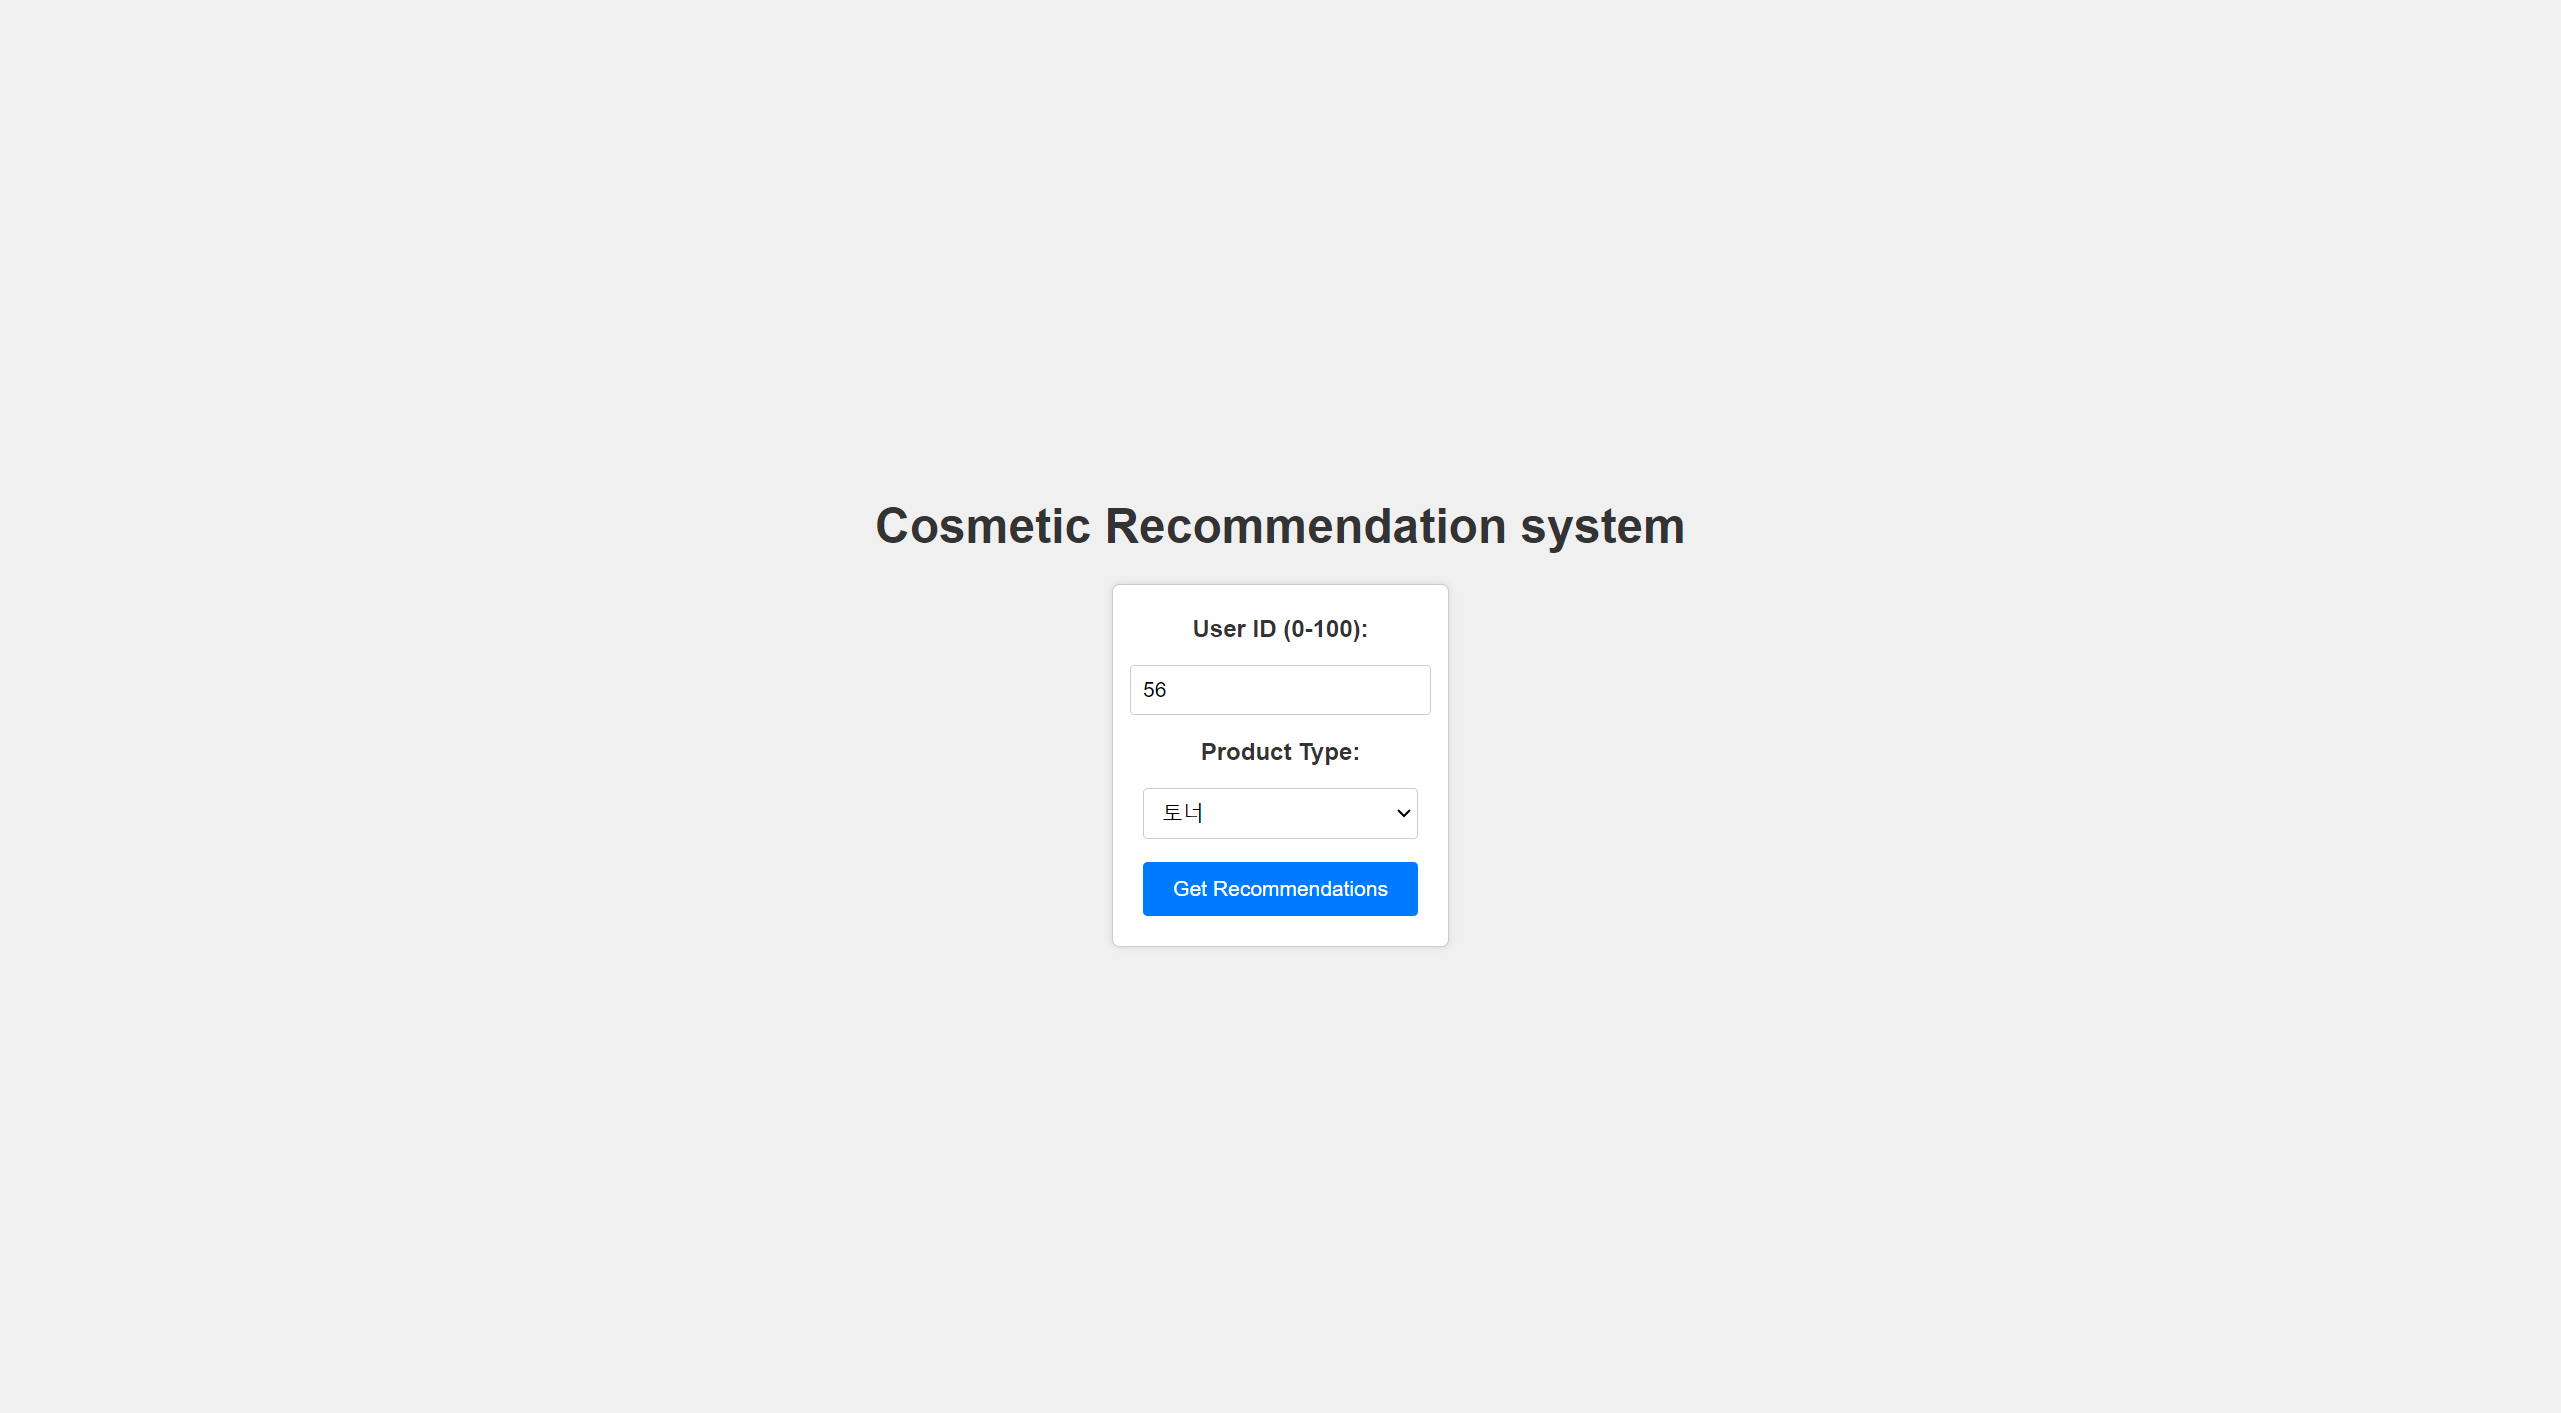

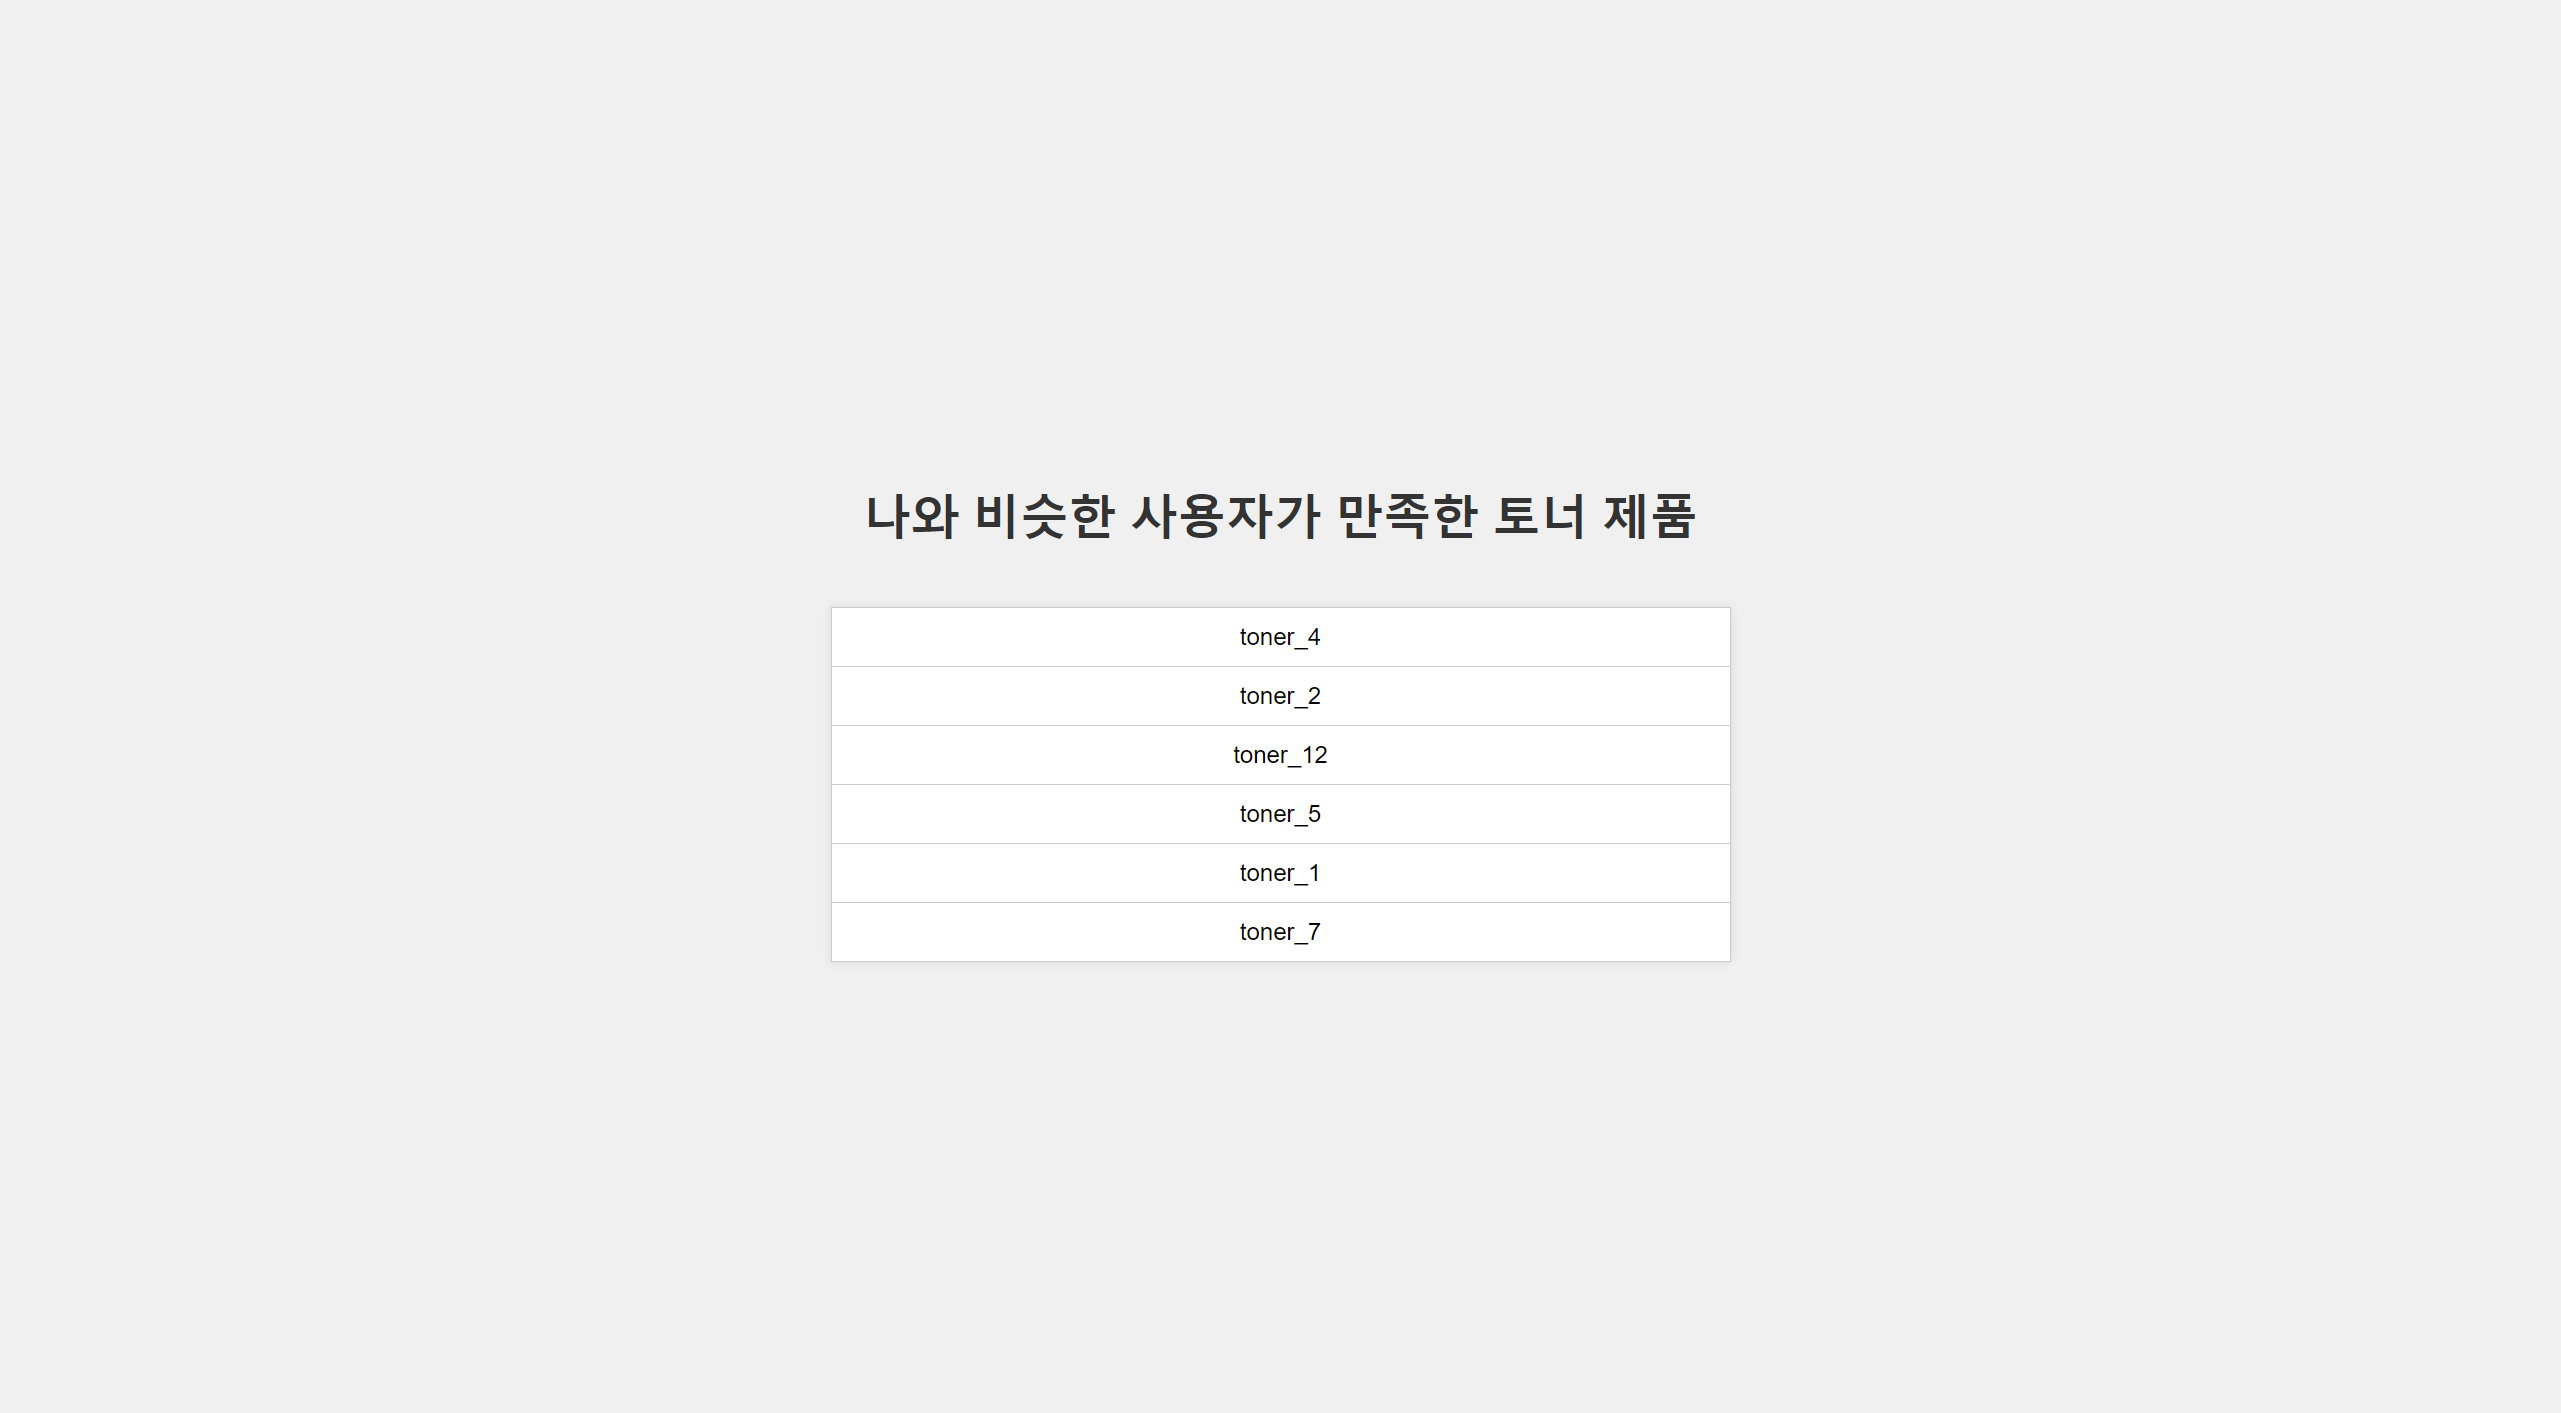